In [3]:
from deal import buy_fund, rebalance
from load_ts import pick_csv_data
from risk_return import anualized_return, anualized_risk

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#plt.rcParams['font.family'] = 'Tsukushi A Round Gothic'
plt.rcParams['font.family'] = 'MyricaM M'

In [ ]:
import matplotlib
#display(matplotlib.matplotlib_fname())  # 設定ファイルの位置
#display(matplotlib.get_configdir())  # フォントキャッシュのディレクトリ
#display(plt.rcParams)  # 設定の出力

# フォントリストの読み込み
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# 描画領域のサイズ調整
plt.figure(figsize=(10,len(fonts)/4))
 
# フォントの表示
for i, font in enumerate(fonts):
    plt.text(0, i, f"日本語01234：{font}", fontname=font)
    
# 見やすいように軸を消す
plt.ylim(0, len(fonts))
plt.axis("off")
plt.show()
# 出力されたフォントリストから、好きなものを plt.rcParams['font.family'] にセットする

In [4]:
conditions = [[{ 'ｅＭＡＸＩＳ全世界株式インデックス':2
               , 'ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）':4
               , 'ｅＭＡＸＩＳ新興国リートインデックス':2
               }  # portfolio
               , list(range(1,13))  # 購入月
               , 1  # 購入金額
               , [3,]  # リバランス月
               , 1  # リバランス条件 (パーセンタイル)
               , 'ACWI 2:GLD 4:REIT 2'  # 条件名
              ] for p in range(11)
             ]

In [5]:
def rebalance_judge(assets, portfolio, threshold = 1):
    '''リバランスするか判断する

    Parameters
    ----------
    assets : pandas.Series
        資産時系列のDataFrameのうち，ジャッジしたい時刻インデックスのスライス
        資産が N 個の時，assets.shape == (1, N)
    portfolio : pandas.Series
        columns が資産時系列の名前, value がその資産のウェイトであり正規化済のもの

    Result
    ------
    buy_rate : pandas.Series
        columns が資産時系列の名前, value がその資産のウェイトであり正規化済のもの
        今回購入の比率

    '''
    rate = assets/assets.sum()  # 資産割合
    diff = (rate-portfolio)*100  # 乖離
    if diff.abs().max() > threshold:
        return True
    else:
        return False

In [15]:
np.round((assets/assets.sum()).values*100,1)

array([26.1, 47.6, 26.3])

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


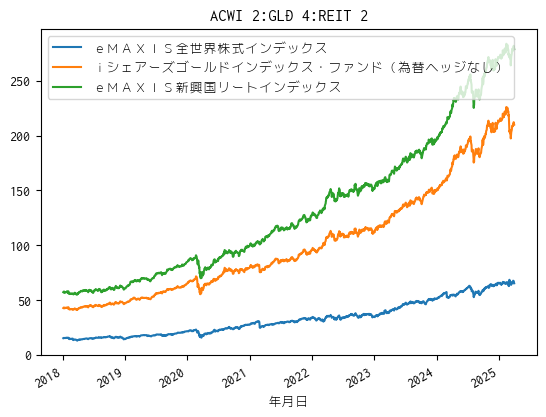

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


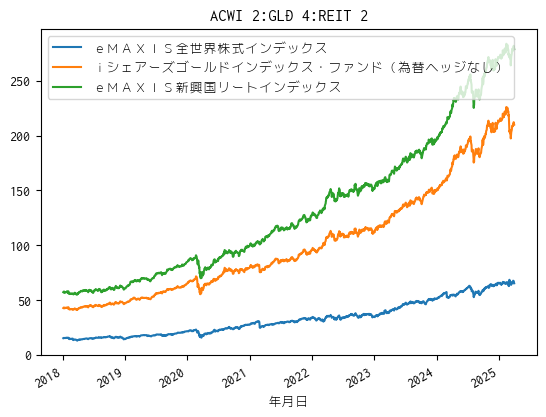

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


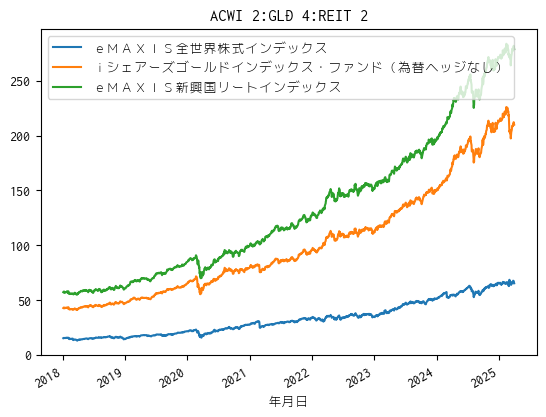

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


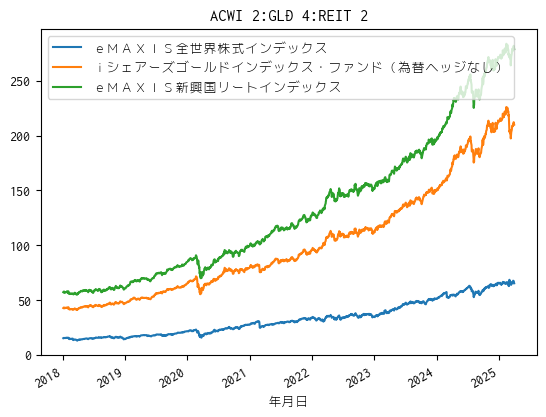

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


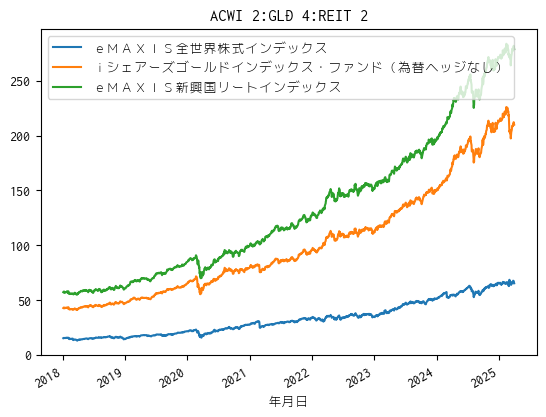

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


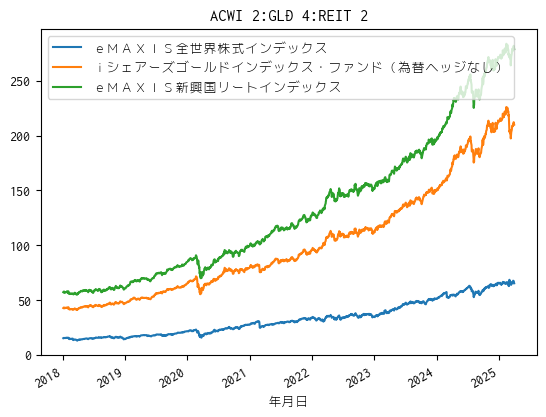

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


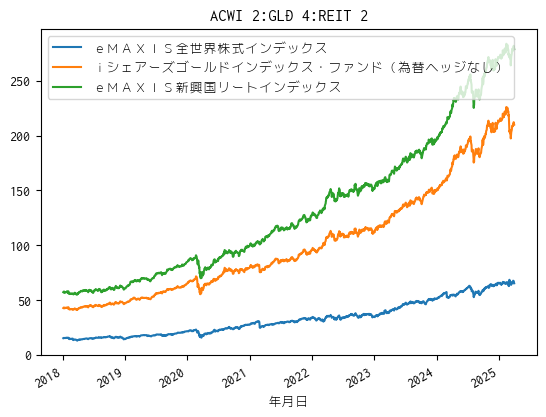

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


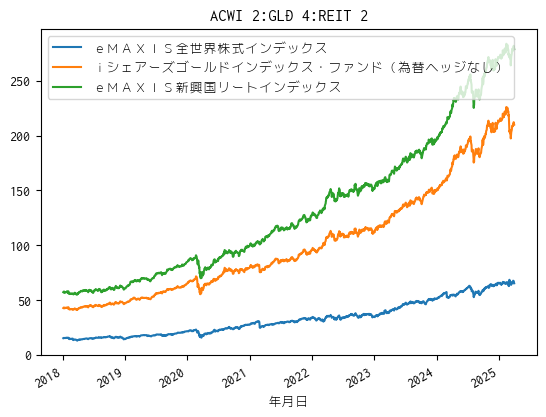

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


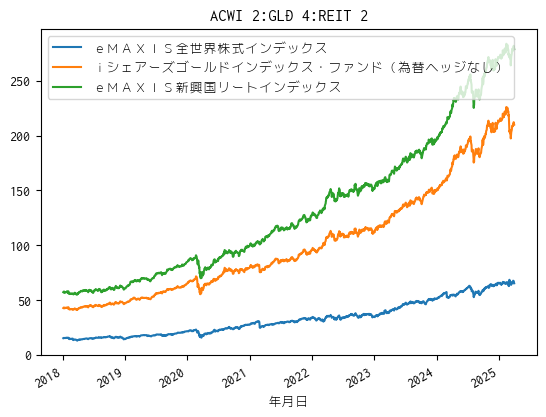

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


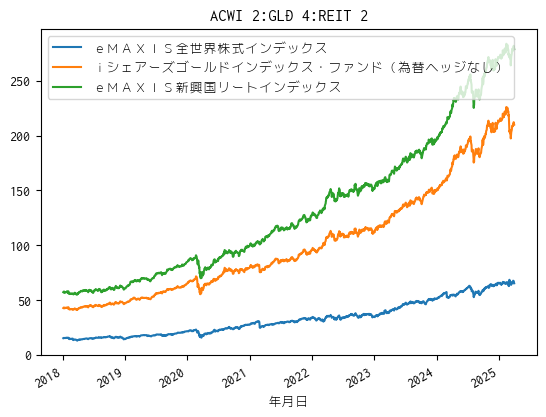

/tmp/ipykernel_26184/3105893941.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += portfolio*buy_amount
/tmp/ipykernel_26184/3105893941.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.014251019527132189' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxes.loc[t] += tax


before [5.00610746 9.14460221 5.04567296] [26.1 47.6 26.3]
after [4.79274388 9.59819131 4.79119641] [25. 50. 25.] 0.014251019527132189
before [ 6.50555578 15.27121854  6.06201079] [23.4 54.9 21.8]
after [ 6.95969628 13.9136806   6.95969628] [25. 50. 25.] 0.0057119535886540635
before [11.88748036 20.15422668 10.81078243] [27.7 47.  25.2]
after [10.68509181 21.42624473 10.71312237] [25. 50. 25.] 0.028030556776280947
before [14.98334701 27.01256113 13.91351464] [26.8 48.3 24.9]
after [13.94059749 27.95471139 13.97735569] [25. 50. 25.] 0.03675820755185855
before [17.58530721 35.17122234 15.68186027] [25.7 51.4 22.9]
after [17.09124423 34.21171084 17.10959745] [25. 50. 25.] 0.025837290219764136
before [20.04918713 45.76764675 16.93735225] [24.2 55.3 20.5]
after [20.68854653 41.24229258 20.68854653] [25.  49.9 25. ] 0.13480048857646948
before [30.05982448 50.1436214  20.86604936] [29.7 49.6 20.6]
after [24.95421501 50.53474762 25.26737381] [24.8 50.2 25.1] 0.3131588006145087
before [37.90975

,ｅＭＡＸＩＳ全世界株式インデックス,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）,ｅＭＡＸＩＳ新興国リートインデックス
年月日,,,
2025-03-25,67.754595,142.518766,68.952821
2025-03-26,67.523568,142.518766,69.043780
2025-03-27,67.052273,142.699427,69.183250
2025-03-28,67.092318,145.079633,69.559213
2025-03-31,65.361155,144.677663,68.661753


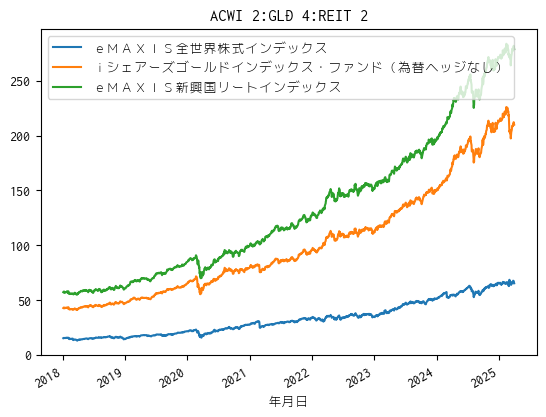

In [17]:
return_risk = {}
total_ts = {}
debug = True

for condition in conditions:

    close_df, _ = pick_csv_data(condition[0].keys())
    portfolio = pd.Series(condition[0])/sum(condition[0].values())

    buy_monthes = condition[1]
    buy_amount = condition[2]
    rebalance_monthes = condition[3]
    threshold = condition[4]
    name = condition[5]
    prev = -1

    result = close_df * 0  # 現在資産
    buy_history = close_df * 0  # 投資記録
    taxes = close_df * 0  # 税金

    for t,v in close_df.iterrows():
        if t.month != prev:
            # reset behavior
            bought = False
            rebalanced = False
            prev = t.month
        if t.month in buy_monthes:
            if not bought:
                # 現在資産比率に基づき購買比率を決定する
                buy_history.loc[t] += portfolio*buy_amount
                # buy_fundで、今買った投信の将来の値動きをベクタとして取得、ポートフォリオ比率をかけて購入後の値動きを結果時系列に加算
                result = result.add(buy_fund(close_df, t)*portfolio*buy_amount, fill_value=0)  # 現在資産に買った投信を加算
                bought = True
        if t.month in rebalance_monthes:
            if not rebalanced:
                if rebalance_judge(result.loc[t], portfolio, threshold):
                    principle = buy_history.cumsum()
                    if debug:
                        assets = result.loc[t]
                        print('before', assets.values, np.round((assets/assets.sum()).values*100,1))
                    sell_buy, tax = rebalance(result.loc[t], principle.loc[t], portfolio)  # リバランスには原価が必要
                    result = result.add(buy_fund(close_df, t)*sell_buy, fill_value=0)  # 現在資産に買った投信を加算
                    buy_history.loc[t] += sell_buy
                    taxes.loc[t] += tax
                    if debug:
                        assets = result.loc[t]
                        print('after', assets.values, np.round((assets/assets.sum()).values*100,1), tax)
                rebalanced = True

    display(result.tail())
    result.loc[datetime.datetime(2018,1,1):].plot(stacked=True, title=name)#, logy=True)
    plt.show()
    plt.close('all')

    total = result.sum(axis=1)

    return_risk[name] = [anualized_return(total, period=60), anualized_risk(total, period=60)]  # 時系列はnameで識別するので複数の比較条件を混在させてもOK
    total_ts[name] = result.sum(axis=1)
